#### 1. Выберите задачу для бизнеса, которую Вы хотите решить с помощью методов машинного обучения. На основание бизнес-задачи, поставьте задачу машинного обучения. Подберите дата-сет и оставьте ссылку на него

___Бизнес-задача:___ Сегментировать клиентов банка по трем категориям.  
___Задача машинного обучения:___ Множественная классификация    
___Ссылка:___ https://www.kaggle.com/datasets/parisrohan/credit-score-classification?select=train.csv

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data_credit = pd.read_csv("Credit.csv")

<ipython-input-2-e5f1941e7f87>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data_credit = pd.read_csv("Credit.csv")


#### 2. Выполните анализ и обработку дата-сета. Этот задание включает в себя следующие этапы работы с данными:
* Первичный анализ данных
* Предобработку данных
* Разведывательный анализ данных (Exploratory Data Analysis)
* Создание признаков (Feature Engineering)
* Отбор признаков (Feature selection)
* Подготовка данных (Data Preparation)



###### Первичный анализ

In [ ]:
data_credit.head(10)

ID Customer_ID     Month             Name   Age          SSN  \
0  0x1602   CUS_0xd40   January    Aaron Maashoh    23  821-00-0265   
1  0x1603   CUS_0xd40  February    Aaron Maashoh    23  821-00-0265   
2  0x1604   CUS_0xd40     March    Aaron Maashoh  -500  821-00-0265   
3  0x1605   CUS_0xd40     April    Aaron Maashoh    23  821-00-0265   
4  0x1606   CUS_0xd40       May    Aaron Maashoh    23  821-00-0265   
5  0x1607   CUS_0xd40      June    Aaron Maashoh    23  821-00-0265   
6  0x1608   CUS_0xd40      July    Aaron Maashoh    23  821-00-0265   
7  0x1609   CUS_0xd40    August              NaN    23    #F%$D@*&8   
8  0x160e  CUS_0x21b1   January  Rick Rothackerj   28_  004-07-5839   
9  0x160f  CUS_0x21b1  February  Rick Rothackerj    28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0  Scientist      19114.12            1824.843333                  3  ...   
1  Scientist      19114.12                    NaN                  3  ...   
2  Scientist      19114.12                    NaN                  3  ...   
3  Scientist      19114.12                    NaN                  3  ...   
4  Scientist      19114.12            1824.843333                  3  ...   
5  Scientist      19114.12                    NaN                  3  ...   
6  Scientist      19114.12            1824.843333                  3  ...   
7  Scientist      19114.12            1824.843333                  3  ...   
8    _______      34847.84            3037.986667                  2  ...   
9    Teacher      34847.84            3037.986667                  2  ...   

   Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0           _            809.98                26.822620   
1        Good            809.98                31.944960   
2        Good            809.98                28.609352   
3        Good            809.98                31.377862   
4        Good            809.98                24.797347   
5        Good            809.98                27.262259   
6        Good            809.98                22.537593   
7        Good            809.98                23.933795   
8        Good            605.03                24.464031   
9        Good            605.03                38.550848   

      Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0  22 Years and 1 Months                     No           49.574949   
1                    NaN                     No           49.574949   
2  22 Years and 3 Months                     No           49.574949   
3  22 Years and 4 Months                     No           49.574949   
4  22 Years and 5 Months                     No           49.574949   
5  22 Years and 6 Months                     No           49.574949   
6  22 Years and 7 Months                     No           49.574949   
7                    NaN                     No           49.574949   
8  26 Years and 7 Months                     No           18.816215   
9  26 Years and 8 Months                     No           18.816215   

  Amount_invested_monthly                 Payment_Behaviour  \
0       80.41529543900253   High_spent_Small_value_payments   
1      118.28022162236736    Low_spent_Large_value_payments   
2         81.699521264648   Low_spent_Medium_value_payments   
3       199.4580743910713    Low_spent_Small_value_payments   
4      41.420153086217326  High_spent_Medium_value_payments   
5      62.430172331195294                            !@9#%8   
6       178.3440674122349    Low_spent_Small_value_payments   
7      24.785216509052056  High_spent_Medium_value_payments   
8        104.291825168246    Low_spent_Small_value_payments   
9       40.39123782853101   High_spent_Large_value_payments   

      Monthly_Balance Credit_Score  
0  312.49408867943663         Good  
1  284.62916249607184         Good  
2   331.2098628537912         Good  
3  223.45130972736786         Good  
4  341.48923103222177         Good  
5   340.4792117872

1. ID: Уникальный идентификатор записи
2.  Customer_ID: Уникальный идентификатор клиента
3. Month: Месяц года
4. Name: Имя человека
5. Age: Возраст человека
6. SSN: Номер социального страхования человека
7. Occupaton: Род занятий человека
8. Annual_Income: Годовой доход человека
9. Monthly_Inhand_Salary: Ежемесячная зарплата человека на руки
10. Num_Bank_Accounts: Количество банковских счетов человека
11. Num_Credit_Card: Количество кредитных карт, имеющихся у данного лица
12. Interest_Rate: Процентная ставка по кредитной карте данного лица
13. Num_of_Loan: Количество кредитов, взятых человеком в банке
14. Type_of_Loan: Типы кредитов, взятых человеком в банке
15. Delay_from_due_date: Среднее количество дней, на которые пользователь задерживает платеж с даты оплаты
16. Num_of_Delayed_Payment: Количество платежей, задержанных пользователем
17. Changed_Credit_Limit: Процентное изменение лимита кредитной карты пользователя
18. Num_credit_quiries: Количество запросов по кредитной карте, сделанных пользователем
19. Credit_Mix: Классификация кредитной карты клиента
20. Outstanding_Debt: Непогашенный остаток средств данного лица.
21. Credit_Utilization_Ratio: Коэффициент использования кредита кредитной картой клиента
22. Credit_History_Age: Возраст кредитной истории пользователя.
23. Payment_of_Min_Amount: Да, если лицо оплатило только минимальную сумму, подлежащую выплате, в противном случае нет.
24. Total_EMI_per_month: Общая сумма EMI за месяц для данного лица
25. Amount_invested_monthly: Ежемесячная сумма, инвестируемая пользователем
26. Payment_Behaviour: Платежное поведение пользователя
27. Monthly_Balance: Ежемесячный баланс, оставшийся на счете пользователя
28. Credit_Score: Кредитный рейтинг пользователя

In [ ]:
data_credit.describe(exclude='object')

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000              3.000000   
50%        13.000000            18.000000              6.000000   
75%        20.000000            28.000000              9.000000   
max      5797.000000            67.000000           2597.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  
count             100000.000000        100000.000000  
mean                  32.285173          1403.118217  
std                    5.116875          8306.041270  
min                   20.000000             0.000000  
25%                   28.052567            30.306660  
50%                   32.305784            69.249473  
75%                   36.496663           161.224249  
max                   50.000000         82331.000000

In [ ]:
data_credit.describe(include='object')

ID Customer_ID    Month    Name     Age        SSN Occupation  \
count   100000      100000   100000   90015  100000     100000     100000   
unique  100000       12500        8   10139    1788      12501         16   
top     0x1602   CUS_0xd40  January  Langep      38  #F%$D@*&8    _______   
freq         1           8    12500      44    2833       5572       7062   

       Annual_Income Num_of_Loan   Type_of_Loan Num_of_Delayed_Payment  \
count         100000      100000          88592                  92998   
unique         18940         434           6260                    749   
top         36585.12           3  Not Specified                     19   
freq              16       14386           1408                   5327   

       Changed_Credit_Limit Credit_Mix Outstanding_Debt  \
count                100000     100000           100000   
unique                 4384          4            13178   
top                       _   Standard          1360.45   
freq                   2091      36479               24   

            Credit_History_Age Payment_of_Min_Amount Amount_invested_monthly  \
count                    90970                100000                   95521   
unique                     404                     3                   91049   
top     15 Years and 11 Months                   Yes               __10000__   
freq                       446                 52326                    4305   

                     Payment_Behaviour                   Monthly_Balance  \
count                           100000                             98800   
unique                               7                             98792   
top     Low_spent_Small_value_payments  __-333333333333333333333333333__   
freq                             25513                                 9   

       Credit_Score  
count        100000  
unique            3  
top        Standard  
freq          53174

In [ ]:
print(f'Количество строк: {data_credit.shape[0]}')
print(f'Количество столбцов: {data_credit.shape[1]}')

Количество строк: 100000
Количество столбцов: 28


In [ ]:
data_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Датасет содержит личные данные и данные, характеризующие объект как клиента банка. Всего датасет содержит 27 признаков, целева переменная - Credit Score.
Стоит отметить, что многие данные имееют тип object, хотя описывают численные характеристики. Это обусловлено ошибками в заполнении данных.

In [ ]:
data_credit['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

##### Предобработка данных

Посмотрим распределение интересующих нас признаков. Это поможет нам выявить аномальные значения.

<Axes: ylabel='Age'>

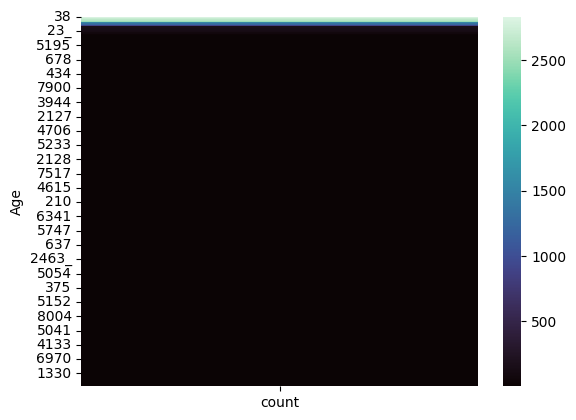

In [ ]:
sns.heatmap(data_credit.Age.value_counts().to_frame(), cmap='mako')

<Axes: ylabel='Occupation'>

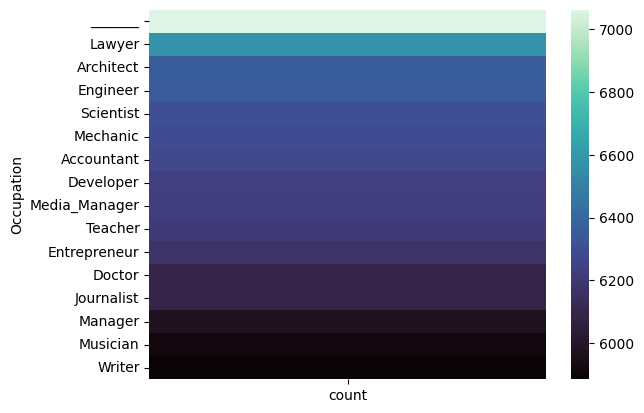

In [ ]:
sns.heatmap(data_credit.Occupation.value_counts().to_frame(), cmap='mako')

<Axes: ylabel='Credit_Mix'>

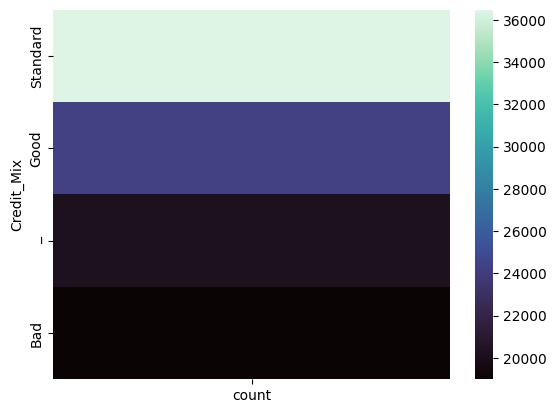

In [ ]:
sns.heatmap(data_credit['Credit_Mix'].value_counts().to_frame(), cmap='mako')

<Axes: ylabel='Payment_of_Min_Amount'>

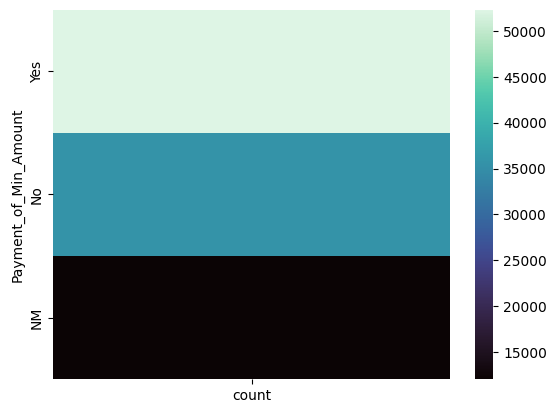

In [ ]:
sns.heatmap(data_credit['Payment_of_Min_Amount'].value_counts().to_frame(), cmap='mako')

<Axes: ylabel='Payment_Behaviour'>

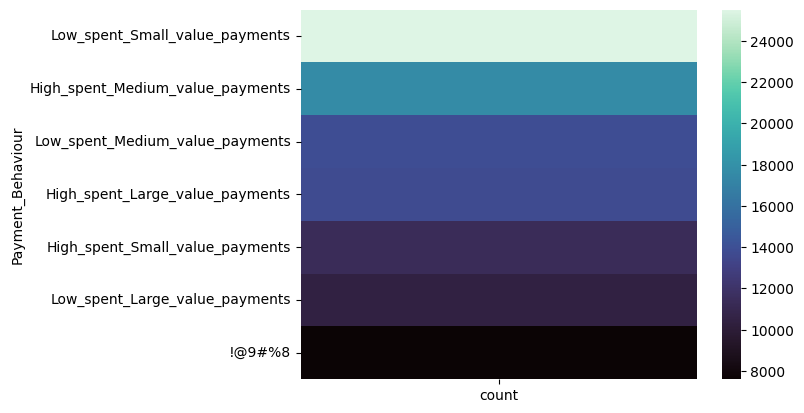

In [ ]:
sns.heatmap(data_credit['Payment_Behaviour'].value_counts().to_frame(), cmap='mako')

<Axes: ylabel='Type_of_Loan'>

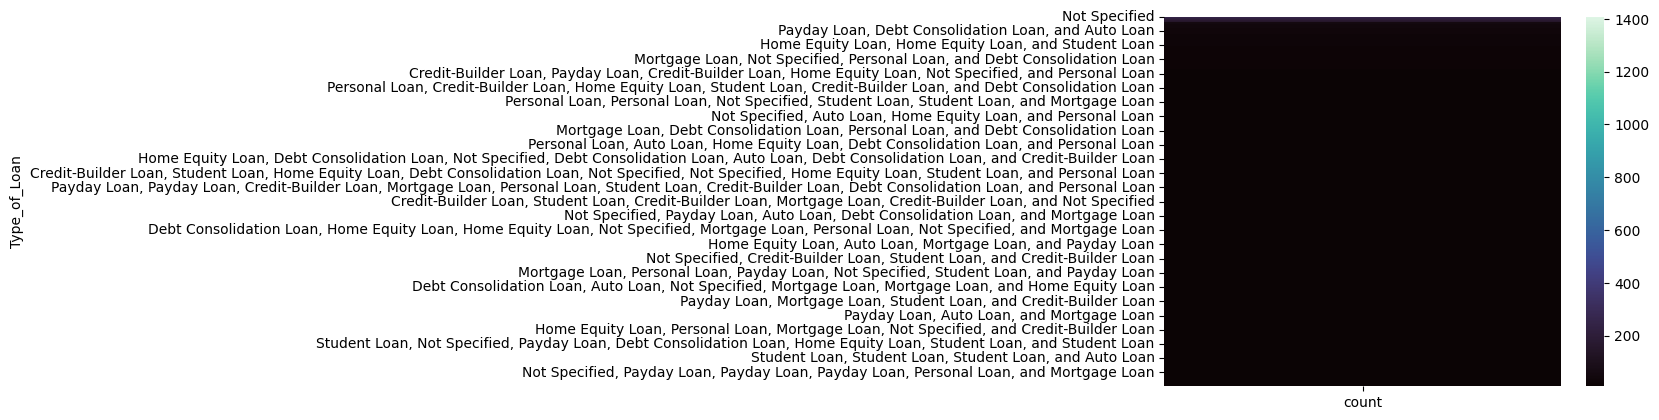

In [ ]:
sns.heatmap(data_credit['Type_of_Loan'].value_counts().to_frame(), cmap='mako')

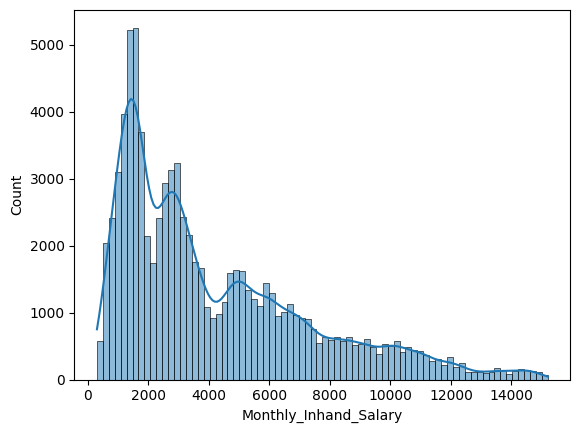

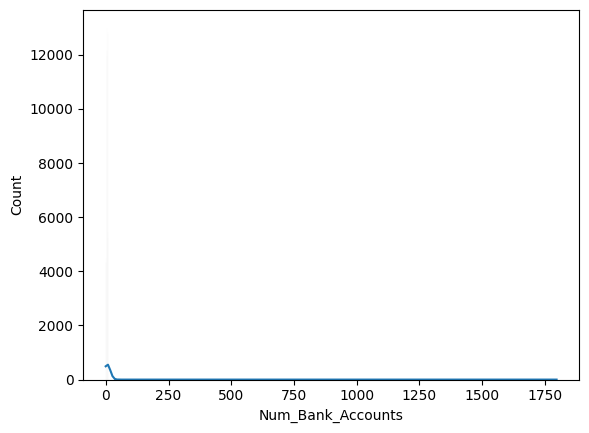

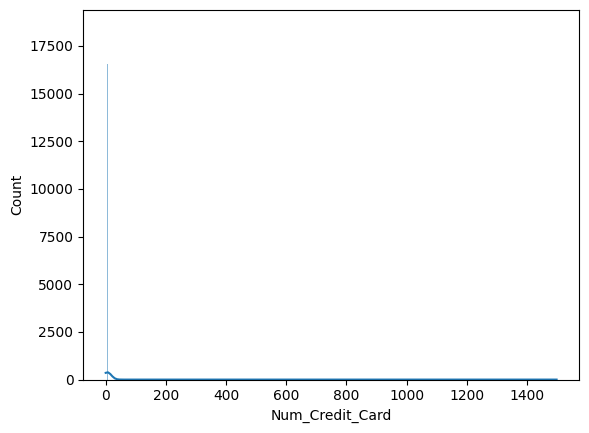

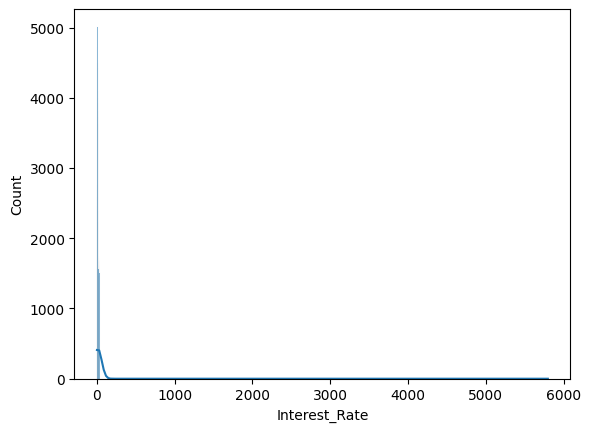

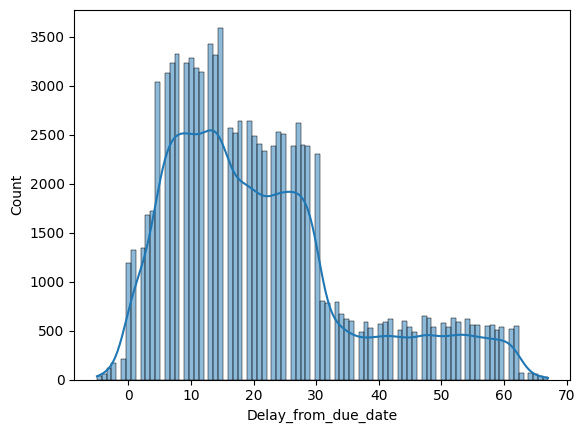

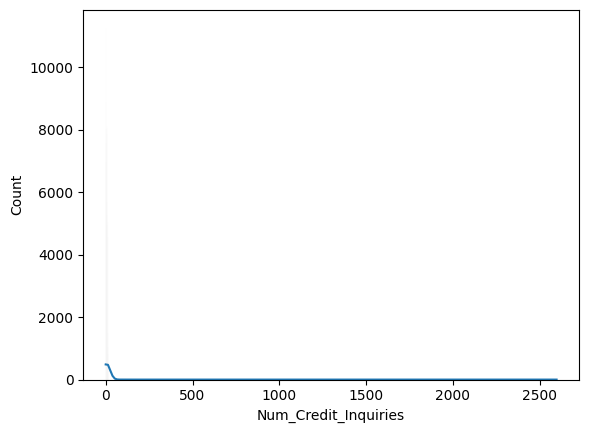

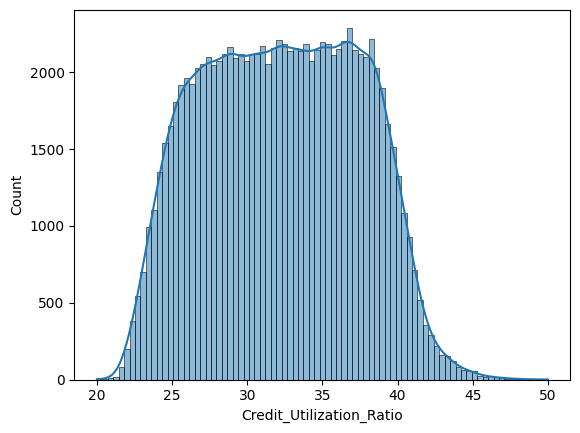

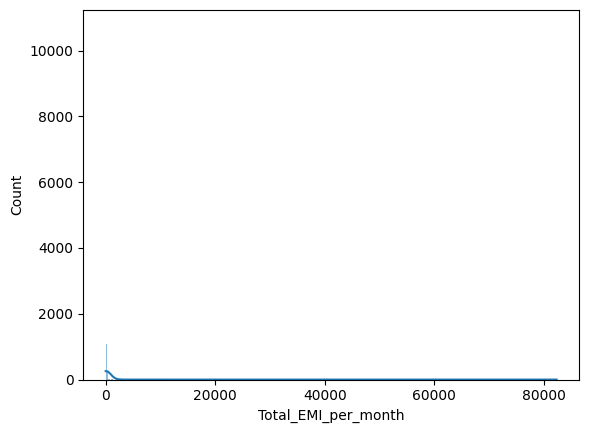

In [ ]:
feature_for_plot = ['Monthly_Inhand_Salary',	'Num_Bank_Accounts',	'Num_Credit_Card',
                    'Interest_Rate',	'Delay_from_due_date',	'Num_Credit_Inquiries',
                    'Credit_Utilization_Ratio',	'Total_EMI_per_month']


for feature in feature_for_plot:
  sns.histplot(data=data_credit[feature], kde=True)
  plt.show()


 Обнаруженные проблемы:    
 1. Численные данные выражены типом object (Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Amount_invested_monthly, Outstanding_Debt, Monthly_Balance )
 2. Признаки имеют неестественные символы "_"
 3. Monthly_Balance, Num_Bank_Accounts, Age имеют отрицательные значения, Num_Credit_Card - 0.
 4. Признак Occupation заполнен "__________"
 5. Столбец Payment_of_Min_Amount содержит непонятное значение NM.

###### Работа с численными признаками

In [ ]:
features = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
                   'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance'] # Список признаков с возможными ошибками

In [ ]:
# Удаляем ненужный элемент
for name in features:
  data_credit[name] = data_credit[name].str.strip('_')

Теперь избавимся от данного заполнения в остальных столбцах.

In [ ]:
data_credit[data_credit == '_'] = np.nan

Проработаем каждый признак

In [ ]:
# Избавляемся от отрицательных значений
data_credit['Num_Bank_Accounts'] = data_credit['Num_Bank_Accounts'].apply(lambda x :abs (x))

In [ ]:
# Изменяем количество крединых карт
data_credit['Num_Credit_Card'] = data_credit['Num_Credit_Card'].replace(0, 1)

In [ ]:
# Убираем пустые строки в численных признаках, чтобы изменить тип
for name in features:
  data_credit[name][data_credit[name] == ''] = np.nan

<ipython-input-21-06a88b2cc91b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_credit[name][data_credit[name] == ''] = np.nan
<ipython-input-21-06a88b2cc91b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_credit[name][data_credit[name] == ''] = np.nan
<ipython-input-21-06a88b2cc91b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_credit[name][data_credit[name] == ''] = np.nan
<ipython-input-21-06a88b2cc91b>:3: Setti

In [ ]:
# Изменяем тип численных признаков
for name in features:
  data_credit[name] = data_credit[name].astype('float')

In [ ]:
# Заменяем отрицательные значения на пустые строки
data_credit['Monthly_Balance'][data_credit['Monthly_Balance'] < 0] = np.nan

<ipython-input-23-ea7d9183cf70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_credit['Monthly_Balance'][data_credit['Monthly_Balance'] < 0] = np.nan


In [ ]:
features_abs = ['Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment']
for name in features_abs:
  data_credit[name] = data_credit[name].apply(lambda x :abs (x))

In [ ]:
data_credit.describe(include='all')

ID Customer_ID    Month    Name            Age        SSN  \
count   100000      100000   100000   90015  100000.000000     100000   
unique  100000       12500        8   10139            NaN      12501   
top     0x1602   CUS_0xd40  January  Langep            NaN  #F%$D@*&8   
freq         1           8    12500      44            NaN       5572   
mean       NaN         NaN      NaN     NaN     110.649700        NaN   
std        NaN         NaN      NaN     NaN     686.244717        NaN   
min        NaN         NaN      NaN     NaN    -500.000000        NaN   
25%        NaN         NaN      NaN     NaN      24.000000        NaN   
50%        NaN         NaN      NaN     NaN      33.000000        NaN   
75%        NaN         NaN      NaN     NaN      42.000000        NaN   
max        NaN         NaN      NaN     NaN    8698.000000        NaN   

       Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count      100000   1.000000e+05           84998.000000      100000.000000   
unique         16            NaN                    NaN                NaN   
top       _______            NaN                    NaN                NaN   
freq         7062            NaN                    NaN                NaN   
mean          NaN   1.764157e+05            4194.170850          17.091700   
std           NaN   1.429618e+06            3183.686167         117.404773   
min           NaN   7.005930e+03             303.645417           0.000000   
25%           NaN   1.945750e+04            1625.568229           3.000000   
50%           NaN   3.757861e+04            3093.745000           6.000000   
75%           NaN   7.279092e+04            5957.448333           7.000000   
max           NaN   2.419806e+07           15204.633333        1798.000000   

        ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
count   ...       79805     100000.000000             100000.000000   
unique  ...           3               NaN                       NaN   
top     ...    Standard               NaN                       NaN   
freq    ...       36479               NaN                       NaN   
mean    ...         NaN       1426.220376                 32.285173   
std     ...         NaN       1155.129026                  5.116875   
min     ...         NaN          0.230000                 20.000000   
25%     ...         NaN        566.072500                 28.052567   
50%     ...         NaN       1166.155000                 32.305784   
75%     ...         NaN       1945.962500                 36.496663   
max     ...         NaN       4998.070000                 50.000000   

            Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
count                    90970                 100000        100000.000000   
unique                     404                      3                  NaN   
top     15 Years and 11 Months                    Yes                  NaN   
freq                       446                  52326                  NaN   
mean                       NaN                    NaN          1403.118217   
std                        NaN                    NaN          8306.041270   
min                        NaN                    NaN             0.000000   
25%                        NaN                    NaN            30.306660   
50%                        NaN                    NaN            69.249473   
75%                        NaN                    NaN           161.224249   
max                        NaN                    NaN         82331.000000   

        Amount_invested_monthly               Payment_Behaviour  \
count              95521.000000                          100000   
unique                      NaN                               7   
top                         NaN  Low_spent_Small_value_payments   
freq                        NaN                           25513   
mean                 637.412998                             NaN   
std   

Обратим внимание на признак Age. Средний возраст клиента 119 лет, а маскимальный возраст 8698. Приступим к замене ошибочных данных.    
Визуализируем распределение данных в пределах реальных значений. Максимальный возраст клиентов до 60 лет. Значения больше можно рассматривать как аномалии

In [ ]:
# Избавляемся от отрицательных значений
data_credit['Age'] = data_credit['Age'].apply(lambda x :abs (x))

<Axes: ylabel='Age'>

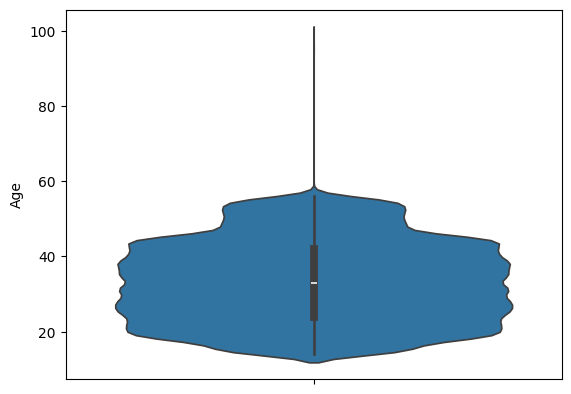

In [ ]:
sns.violinplot(data_credit.Age[data_credit.Age < 100])

In [ ]:
# Заменяем отрицательные значения на пустые строки
data_credit.Age[data_credit.Age > 90] = np.nan

<ipython-input-28-21091a24e3ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_credit.Age[data_credit.Age > 90] = np.nan


<Axes: >

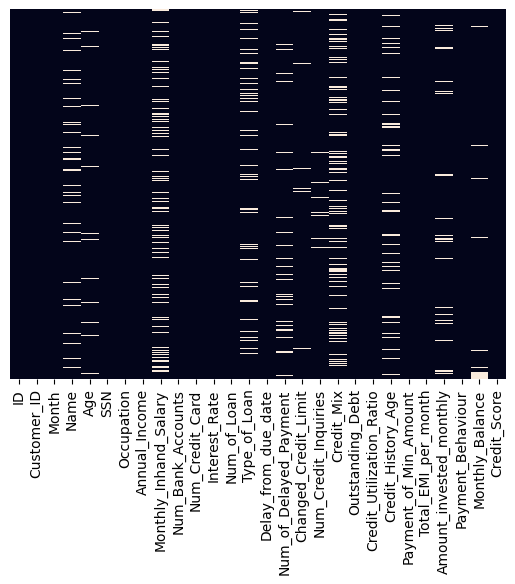

In [ ]:
sns.heatmap(data_credit.isnull(), yticklabels=False, cbar=False)

Заполним пустые значения методом K-ближайщих, т к каждые 8 значений признаков описывают финансовое состояние клиента на протяжении 8 месяцев.

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer = KNNImputer(n_neighbors=1)

In [ ]:
data_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       97219 non-null   float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
num_col = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
           'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment',
           'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
           'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly',
           'Monthly_Balance']
id = 1
for ID in data_credit['Customer_ID'].unique() :
    data_credit['Customer_ID'] = data_credit['Customer_ID'].replace(ID,id)
    id += 1

In [ ]:
for col in num_col:
  imputer.fit(data_credit[['Customer_ID', col]])
  data_credit[['Customer_ID', col]] = imputer.transform(data_credit[['Customer_ID', col]])

<Axes: >

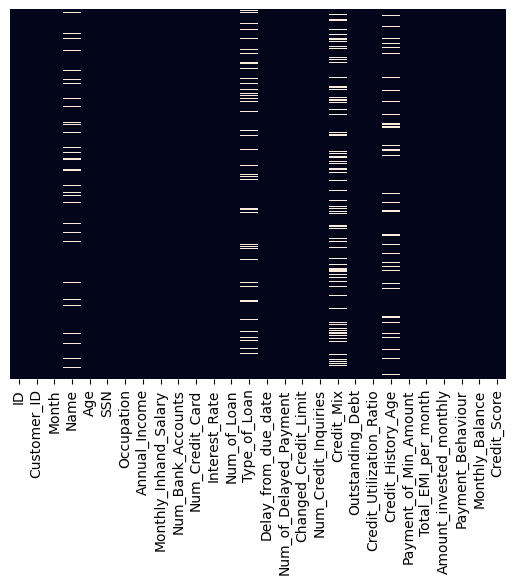

In [ ]:
sns.heatmap(data_credit.isnull(), yticklabels=False, cbar=False)

###### Работа со строковыми признаками

In [ ]:
data_credit.describe(include='object')

ID    Month    Name        SSN Occupation   Type_of_Loan  \
count   100000   100000   90015     100000     100000          88592   
unique  100000        8   10139      12501         16           6260   
top     0x1602  January  Langep  #F%$D@*&8    _______  Not Specified   
freq         1    12500      44       5572       7062           1408   

       Credit_Mix      Credit_History_Age Payment_of_Min_Amount  \
count       79805                   90970                100000   
unique          3                     404                     3   
top      Standard  15 Years and 11 Months                   Yes   
freq        36479                     446                 52326   

                     Payment_Behaviour Credit_Score  
count                           100000       100000  
unique                               7            3  
top     Low_spent_Small_value_payments     Standard  
freq                             25513        53174

Необходимо заменить отсутсвующие значения в признаке Occupation и заполнить пустые строки.

In [ ]:
# Найдем id клиентов, в столбце Occupation которых есть незаполненное значение
id = data_credit[data_credit['Occupation'] == '_______']['Customer_ID']
id

8            2.0
16           3.0
18           3.0
20           3.0
29           4.0
          ...   
99920    12491.0
99935    12492.0
99937    12493.0
99943    12493.0
99989    12499.0
Name: Customer_ID, Length: 7062, dtype: float64

In [ ]:
# Найдем моду по группе значений и заменим неправильное значение
for i in id:
  cur_val = data_credit[data_credit['Customer_ID'] == i]['Occupation'].mode()[0]
  data_credit[data_credit['Customer_ID'] == i] = data_credit[data_credit['Customer_ID'] == i].replace('_______', cur_val)

In [ ]:
# Заполним оставшиеся значения модой всего признака
data_credit['Occupation'] = data_credit['Occupation'].replace('_______', data_credit['Occupation'].mode()[0])

<Axes: ylabel='Occupation'>

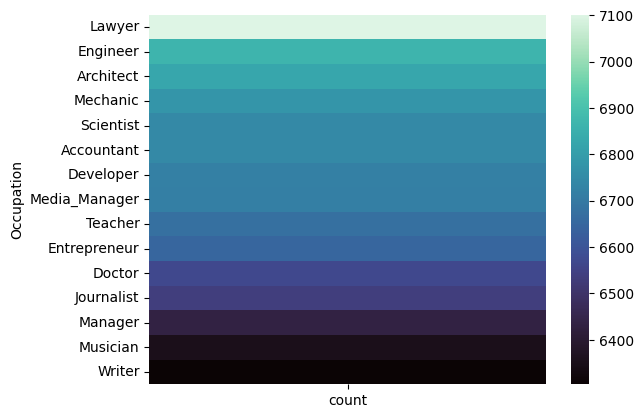

In [ ]:
sns.heatmap(data_credit.Occupation.value_counts().to_frame(), cmap='mako')

In [ ]:
# В столбце Payment_of_Min_Amount заменяем непонятное значение
data_credit['Payment_of_Min_Amount'] = data_credit['Payment_of_Min_Amount'].replace('NM','No')

In [ ]:
data_credit['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     47674
Name: count, dtype: int64

In [ ]:
def find_digit(row):
  if isinstance(row, str):
    digit = [int(char) for char in row.split(' ') if char.isdigit()]
    return digit[0] * 12 + digit[1]
  else:
    return np.nan

In [ ]:
data_credit['Credit_History_Age'] = data_credit['Credit_History_Age'].apply(find_digit)

Теперь приступим к заполнению пустых значений в готовых столбцах.  Для числовых признаков так же воспользуемся методом К-ближайщих соседей.

<Axes: >

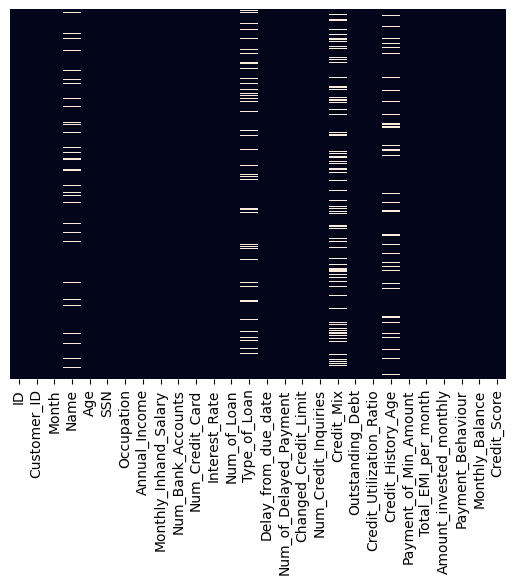

In [ ]:
sns.heatmap(data_credit.isnull(), yticklabels=False, cbar=False)

In [ ]:
# Выбираем id клиентов, где не указан признак Credit_Mix
id_CM = data_credit[data_credit['Credit_Mix'].isna()]['Customer_ID']
id_CM

0            1.0
10           2.0
19           3.0
29           4.0
35           5.0
          ...   
99988    12499.0
99992    12500.0
99994    12500.0
99995    12500.0
99996    12500.0
Name: Customer_ID, Length: 20195, dtype: float64

In [ ]:
for i in id_CM:
  cur_val = data_credit[data_credit['Customer_ID'] == i]['Credit_Mix'].mode()[0]
  data_credit['Credit_Mix'][data_credit['Customer_ID'] == i] = data_credit['Credit_Mix'][data_credit['Customer_ID'] == i].replace(np.nan, cur_val)

Выходные данные были обрезаны до нескольких последних строк (5000).
<ipython-input-47-1ea59145c725>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_credit['Credit_Mix'][data_credit['Customer_ID'] == i] = data_credit['Credit_Mix'][data_credit['Customer_ID'] == i].replace(np.nan, cur_val)
<ipython-input-47-1ea59145c725>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_credit['Credit_Mix'][data_credit['Customer_ID'] == i] = data_credit['Credit_Mix'][data_credit['Customer_ID'] == i].replace(np.nan, cur_val)
<ipython-input-47-1ea59145c725>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [ ]:
data_credit['Credit_Mix'].value_counts()

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

<Axes: >

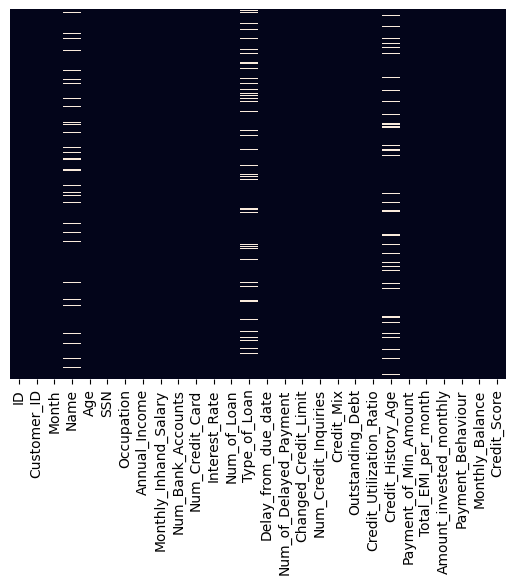

In [ ]:
sns.heatmap(data_credit.isnull(), yticklabels=False, cbar=False)

In [ ]:
data_credit['Payment_Behaviour']= data_credit['Payment_Behaviour'].replace("!@9#%8",np.nan)

In [ ]:
id_PB = data_credit[data_credit['Payment_Behaviour'].isna()]['Customer_ID']
id_PB

5            1.0
16           3.0
32           5.0
47           6.0
54           7.0
          ...   
99947    12494.0
99980    12498.0
99982    12498.0
99989    12499.0
99999    12500.0
Name: Customer_ID, Length: 7600, dtype: float64

In [ ]:
for i in id_PB:
  cur_val = data_credit[data_credit['Customer_ID'] == i]['Payment_Behaviour'].mode()[0]
  data_credit['Payment_Behaviour'][data_credit['Customer_ID'] == i] = data_credit['Payment_Behaviour'][data_credit['Customer_ID'] == i].replace(np.nan, cur_val)

Выходные данные были обрезаны до нескольких последних строк (5000).
<ipython-input-52-85a98138d57a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_credit['Payment_Behaviour'][data_credit['Customer_ID'] == i] = data_credit['Payment_Behaviour'][data_credit['Customer_ID'] == i].replace(np.nan, cur_val)
<ipython-input-52-85a98138d57a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_credit['Payment_Behaviour'][data_credit['Customer_ID'] == i] = data_credit['Payment_Behaviour'][data_credit['Customer_ID'] == i].replace(np.nan, cur_val)
<ipython-input-52-85a98138d57a>:3: SettingWithCopyWarning: 
A value is trying 

<Axes: >

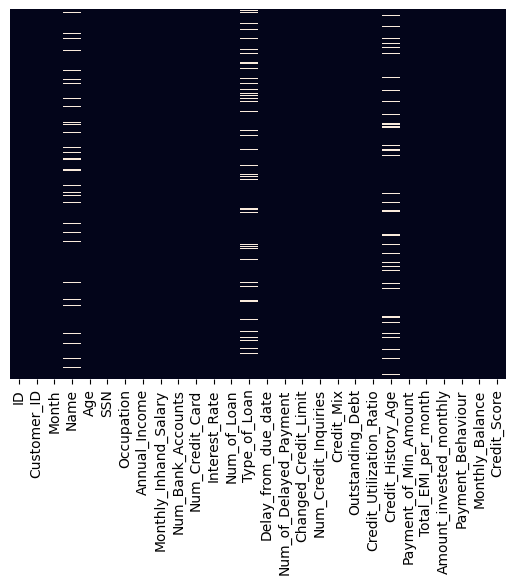

In [ ]:
sns.heatmap(data_credit.isnull(), yticklabels=False, cbar=False)

In [ ]:
data_credit['Credit_History_Age'].value_counts()

Credit_History_Age
191.0    446
232.0    445
233.0    444
215.0    443
231.0    441
        ... 
3.0       20
2.0       15
403.0     14
404.0     12
1.0        2
Name: count, Length: 404, dtype: int64

In [ ]:
imputer.fit(data_credit[['Customer_ID', 'Credit_History_Age']])
data_credit[['Customer_ID', 'Credit_History_Age']] = imputer.transform(data_credit[['Customer_ID', 'Credit_History_Age']])

<Axes: >

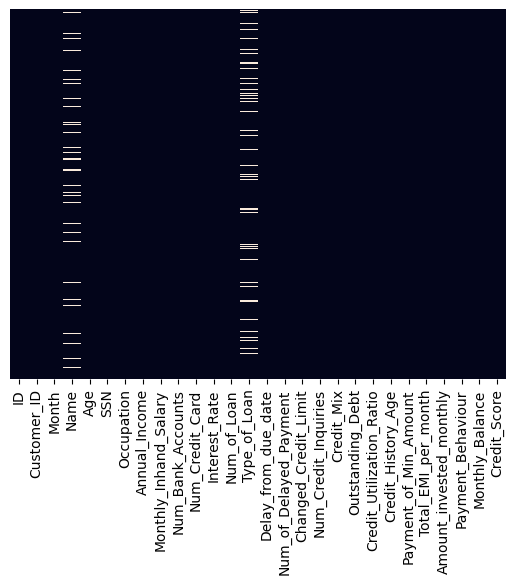

In [ ]:
sns.heatmap(data_credit.isnull(), yticklabels=False, cbar=False)

In [ ]:
data_credit['Credit_Score'] = data_credit['Credit_Score'].map({"Poor":0, "Standard":1, "Good":2})

##### Разведывательный анализ данных (Exploratory Data Analysis)

После преобразования данных построим графики распределения признаков и их влияния на целевую переменную.

In [ ]:
numeric_features = data_credit.select_dtypes(exclude='object').columns[1:]
numeric_features

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

Распределение численных признаков

<ipython-input-59-d442032290be>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_credit[name], label=f'Рапсределение признака {name}')


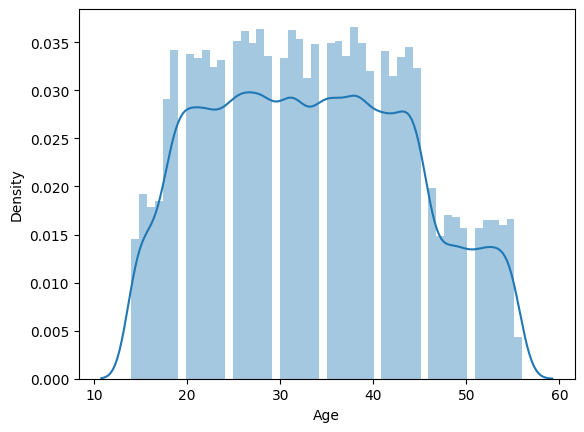

<ipython-input-59-d442032290be>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_credit[name], label=f'Рапсределение признака {name}')


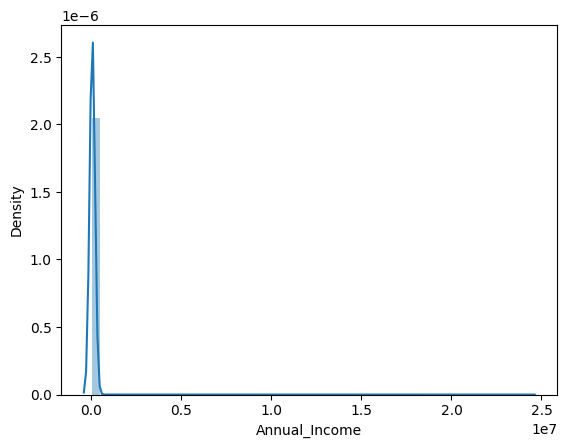

<ipython-input-59-d442032290be>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_credit[name], label=f'Рапсределение признака {name}')


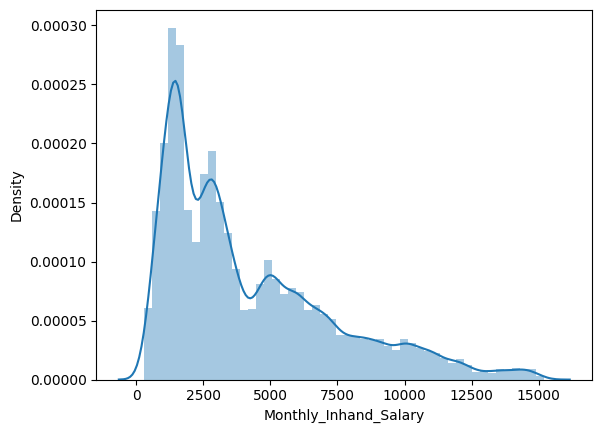

<ipython-input-59-d442032290be>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_credit[name], label=f'Рапсределение признака {name}')


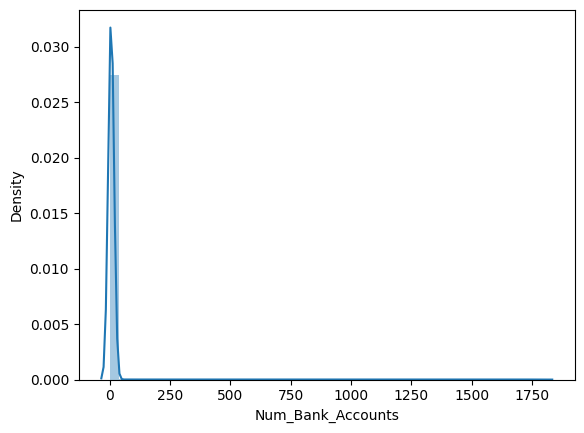

<ipython-input-59-d442032290be>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_credit[name], label=f'Рапсределение признака {name}')


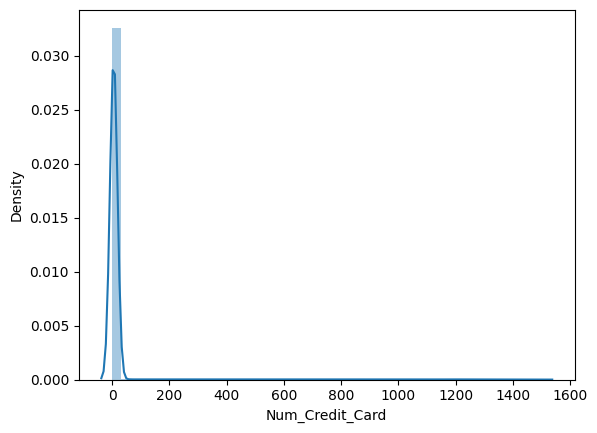

<ipython-input-59-d442032290be>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_credit[name], label=f'Рапсределение признака {name}')


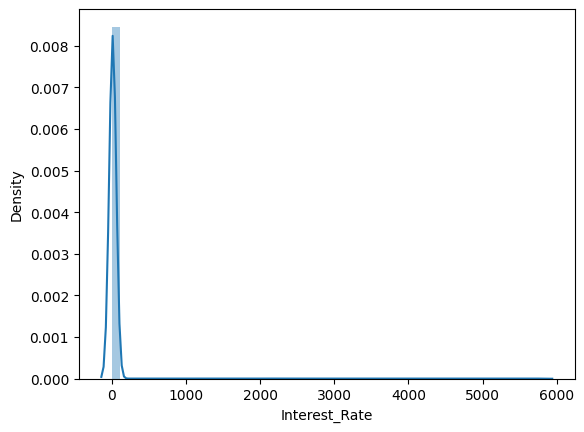

<ipython-input-59-d442032290be>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_credit[name], label=f'Рапсределение признака {name}')


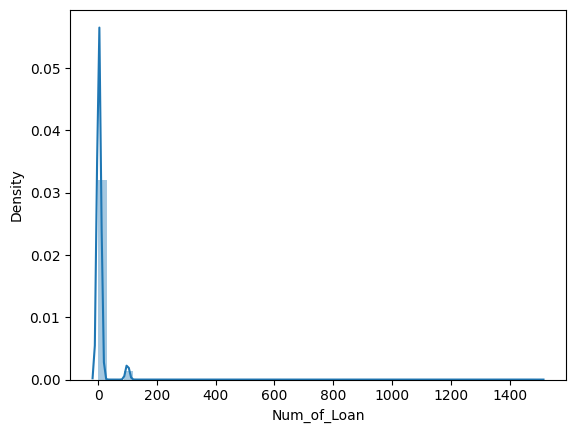

<ipython-input-59-d442032290be>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_credit[name], label=f'Рапсределение признака {name}')


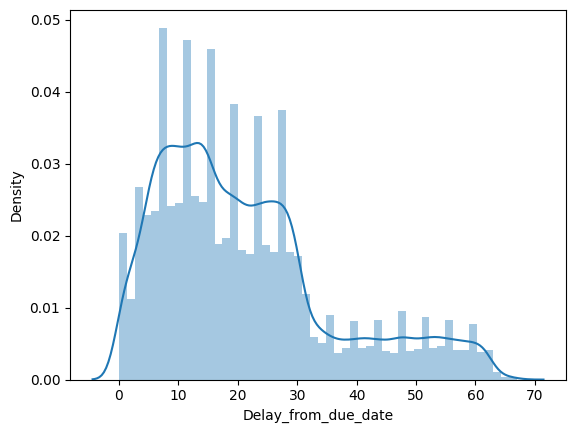

<ipython-input-59-d442032290be>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_credit[name], label=f'Рапсределение признака {name}')


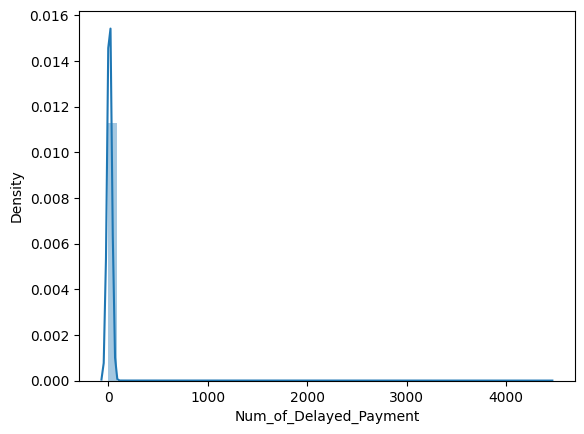

<ipython-input-59-d442032290be>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_credit[name], label=f'Рапсределение признака {name}')


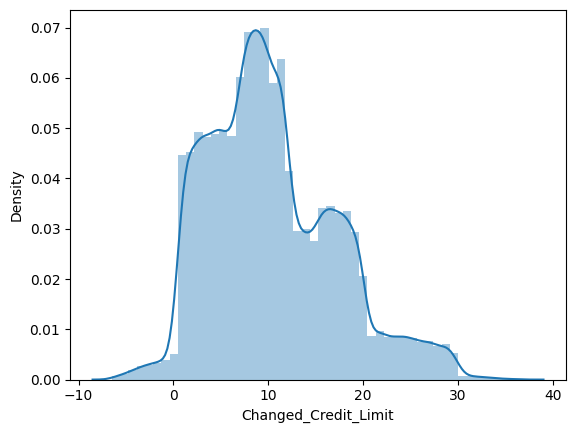

<ipython-input-59-d442032290be>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_credit[name], label=f'Рапсределение признака {name}')


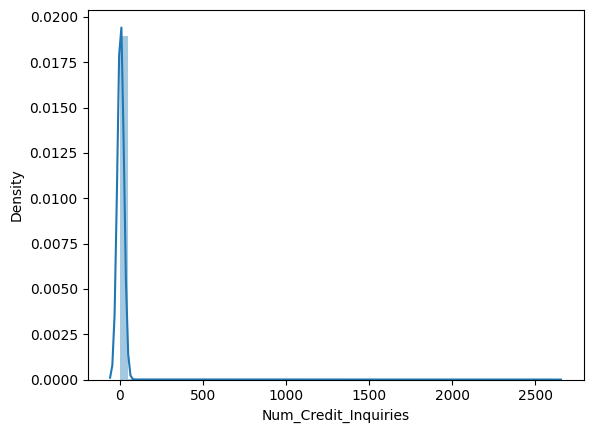

<ipython-input-59-d442032290be>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_credit[name], label=f'Рапсределение признака {name}')


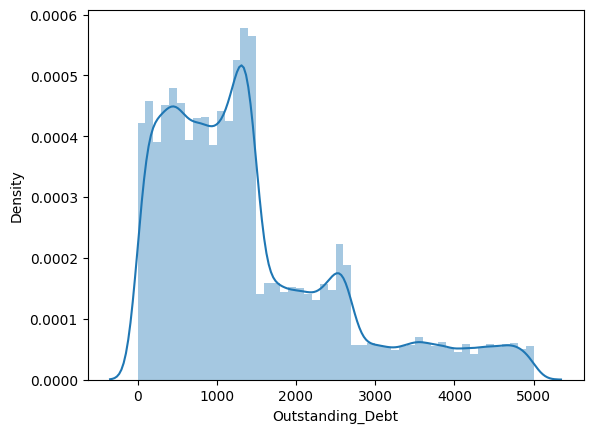

<ipython-input-59-d442032290be>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_credit[name], label=f'Рапсределение признака {name}')


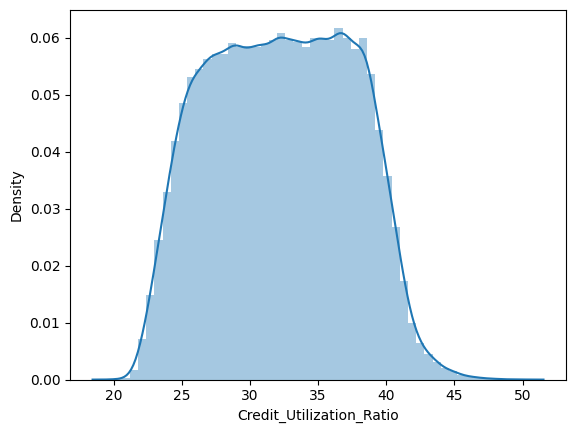

<ipython-input-59-d442032290be>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_credit[name], label=f'Рапсределение признака {name}')


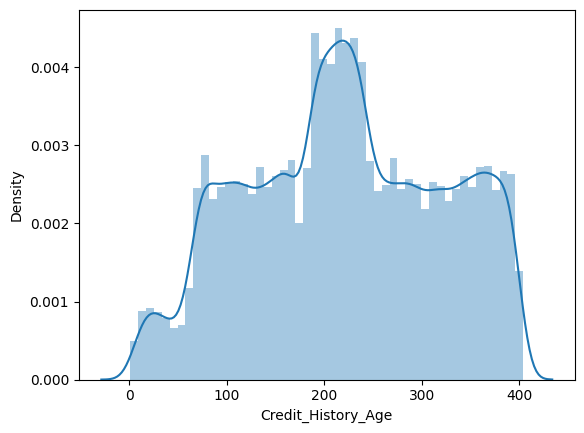

<ipython-input-59-d442032290be>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_credit[name], label=f'Рапсределение признака {name}')


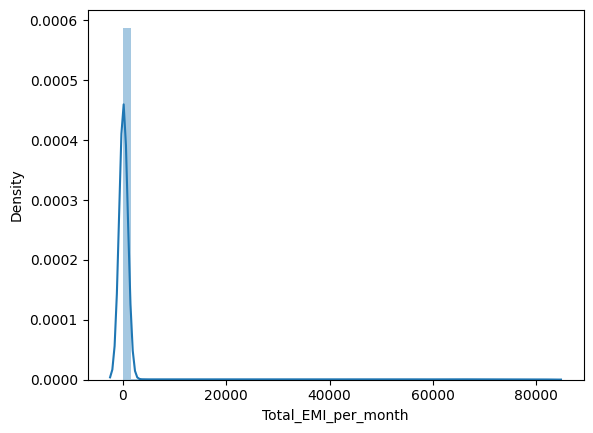

<ipython-input-59-d442032290be>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_credit[name], label=f'Рапсределение признака {name}')


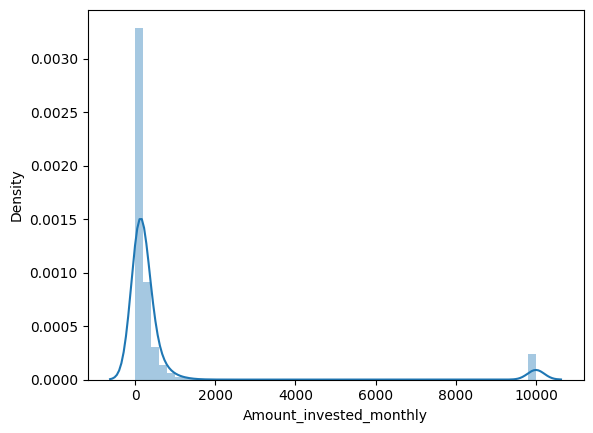

<ipython-input-59-d442032290be>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_credit[name], label=f'Рапсределение признака {name}')


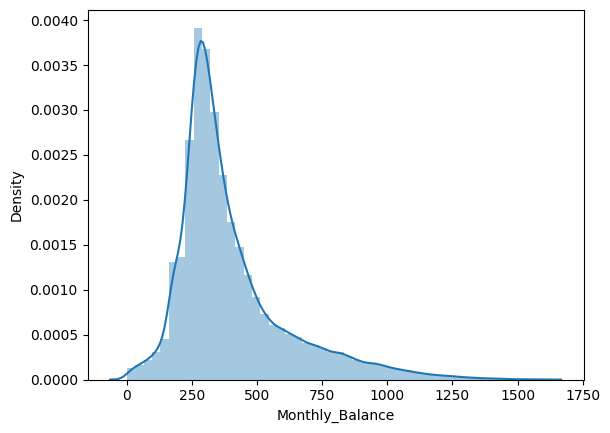

<ipython-input-59-d442032290be>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_credit[name], label=f'Рапсределение признака {name}')


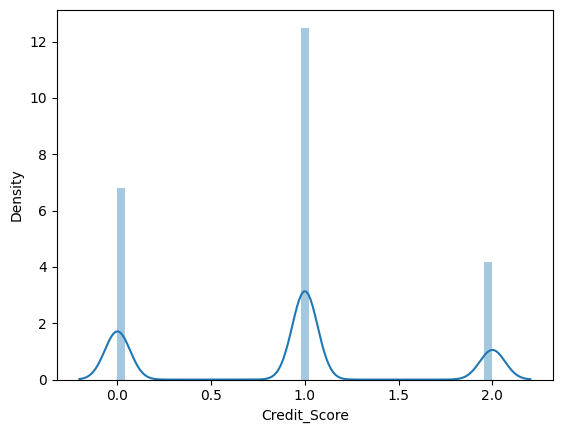

In [ ]:
for name in numeric_features:
  sns.distplot(data_credit[name], label=f'Рапсределение признака {name}')
  plt.show()

Построим распределение выбранного атрибута при разных значениях целевой переменной

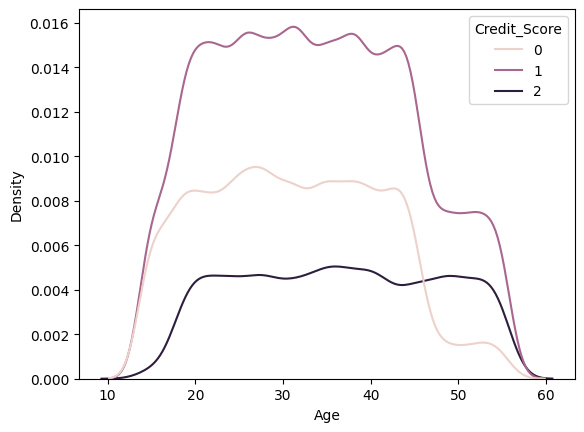

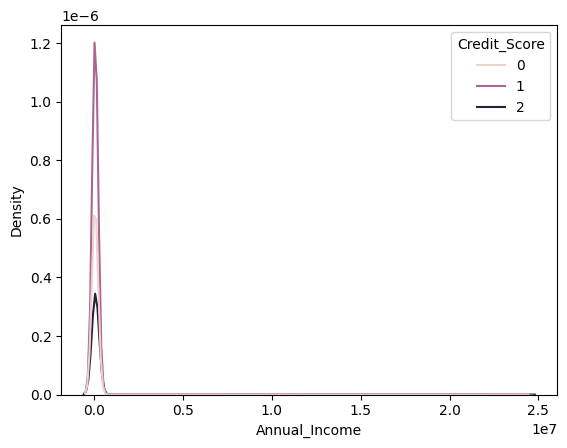

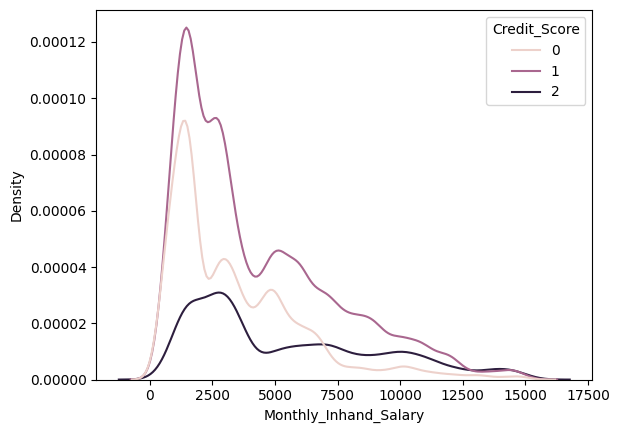

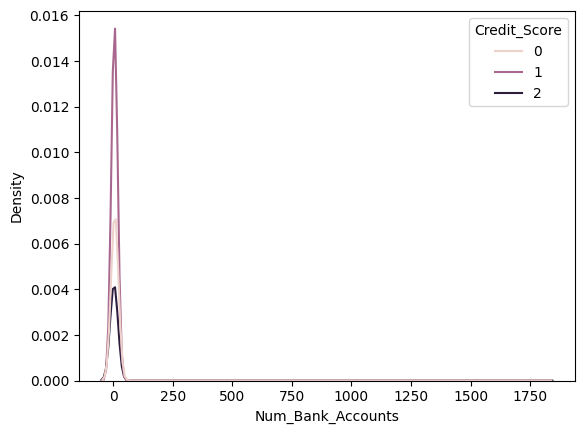

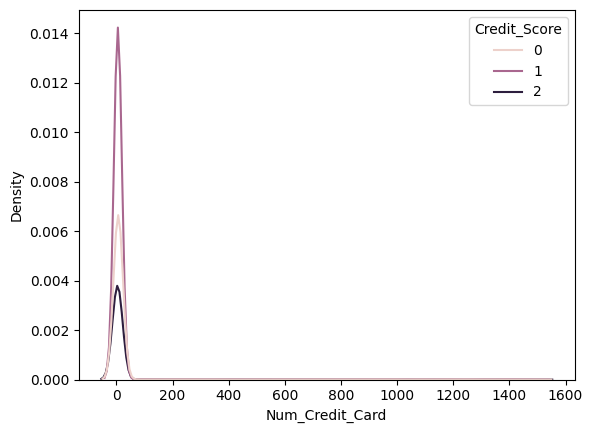

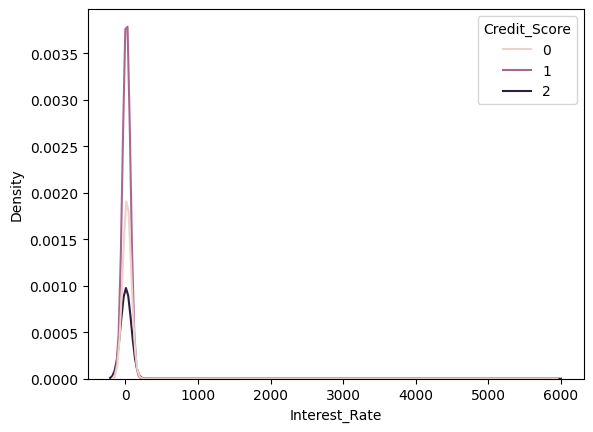

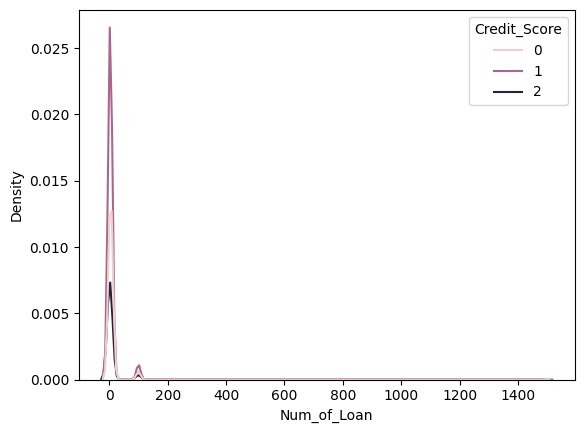

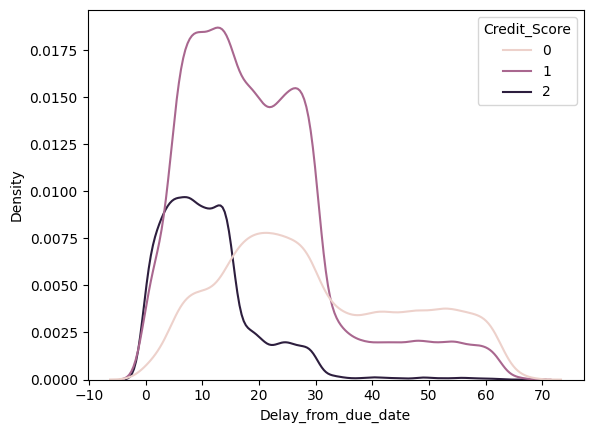

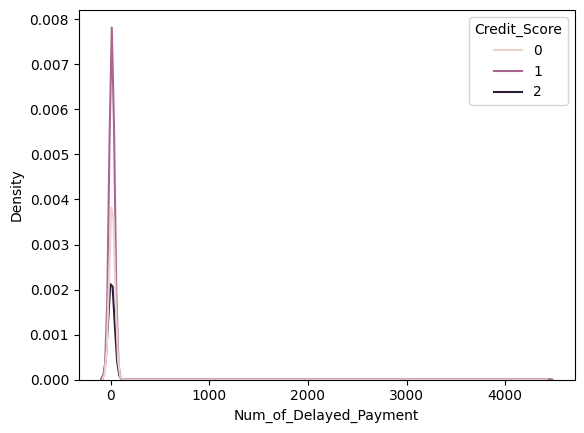

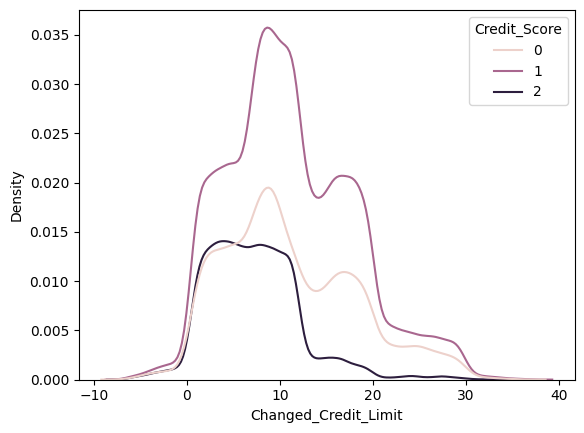

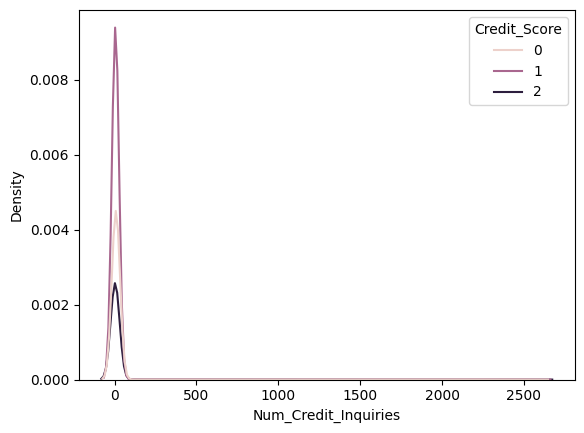

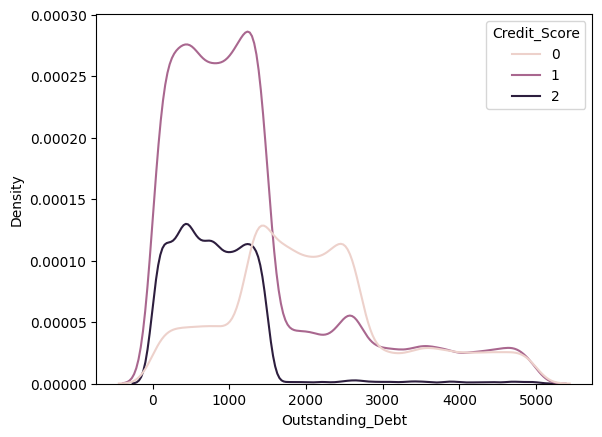

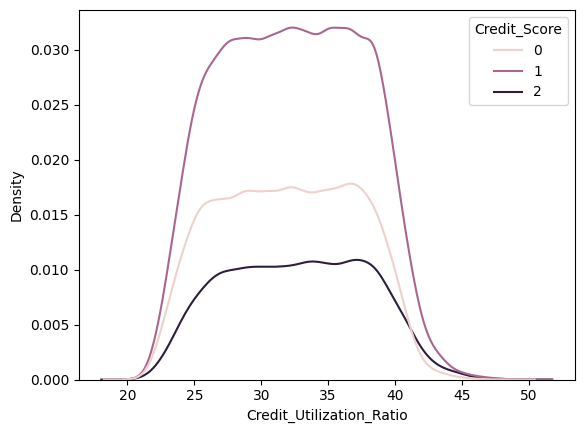

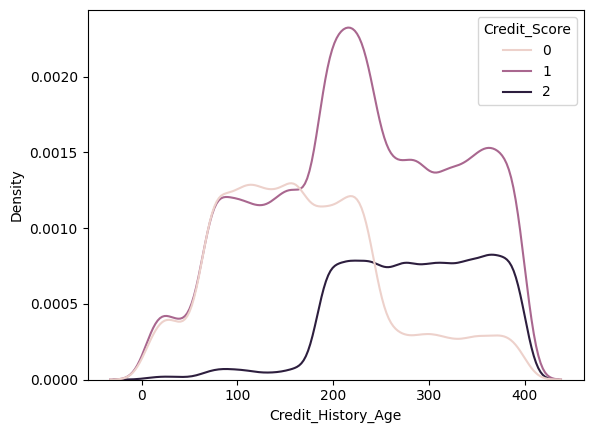

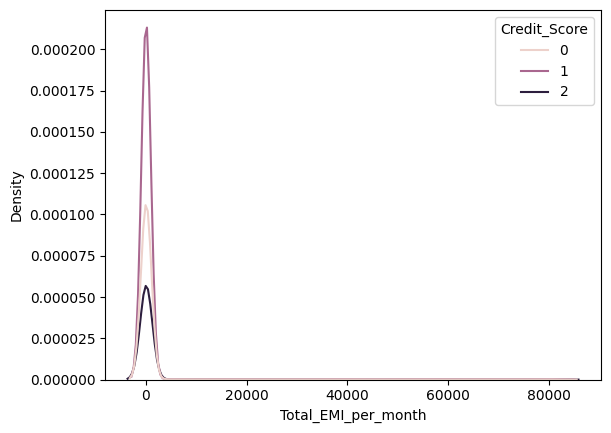

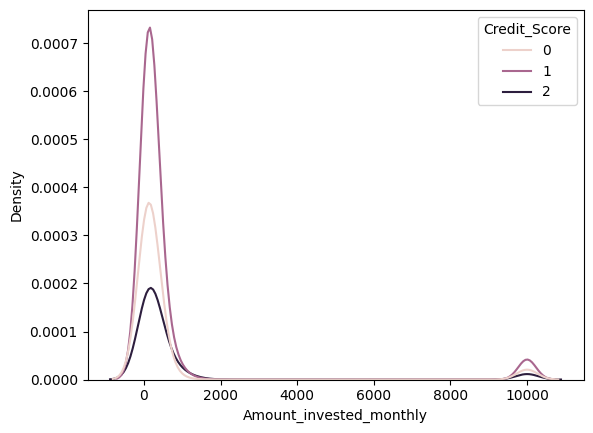

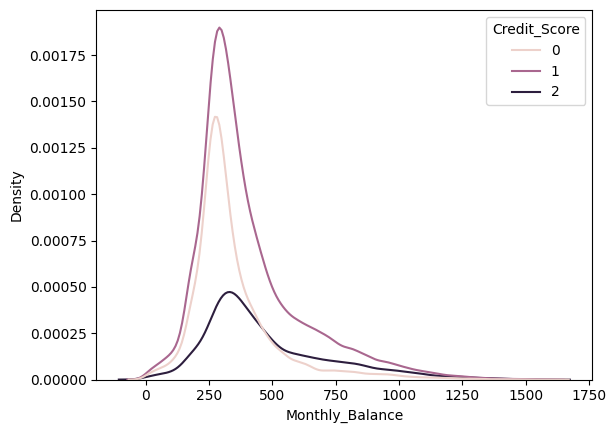

<ipython-input-60-8475c239c873>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data_credit, x=name, hue="Credit_Score")


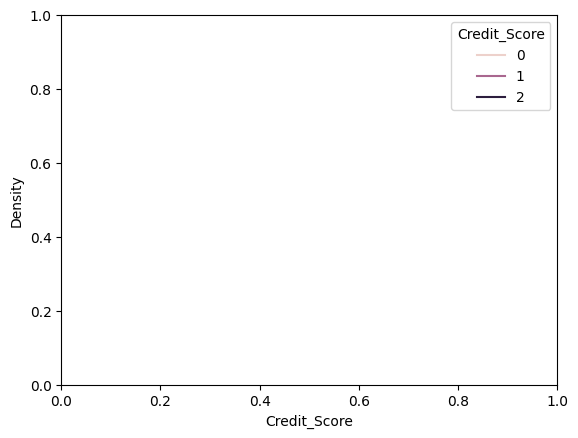

In [ ]:
for name in numeric_features:
  sns.kdeplot(data=data_credit, x=name, hue="Credit_Score")
  plt.show()

Явное влияние на целевую переменную каждого отдельного атрибута не найдено. Скорее всего, на нее влияет совокупность нескольких признаков.

In [ ]:
object_feature = ['Month',  'Occupation', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour']

Распределение категориальных признаков

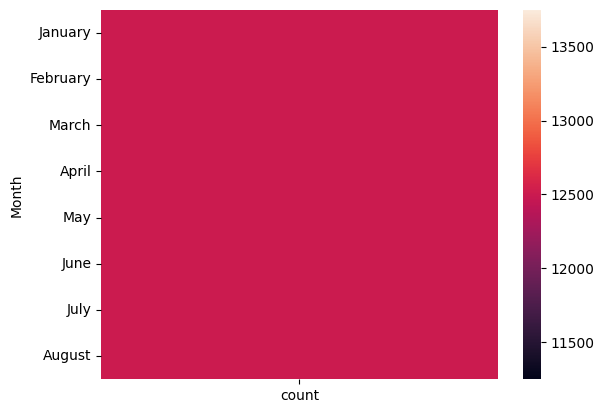

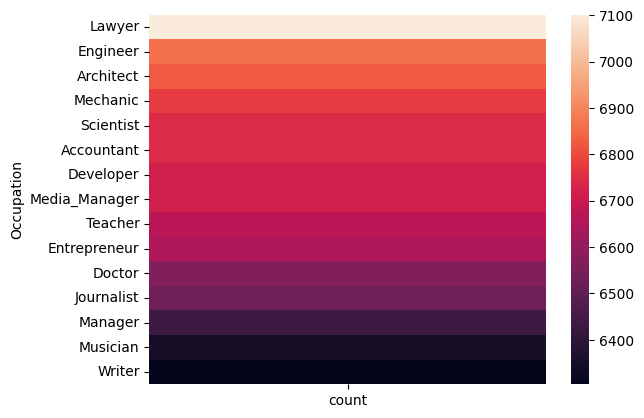

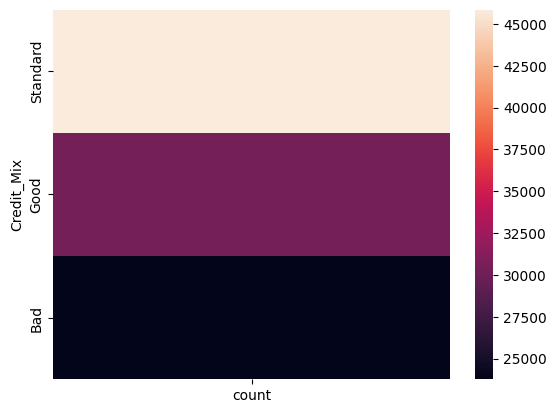

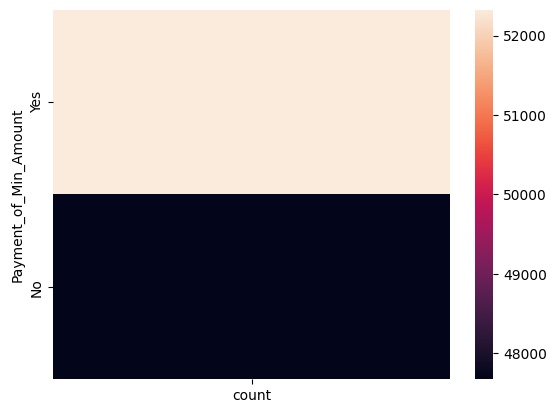

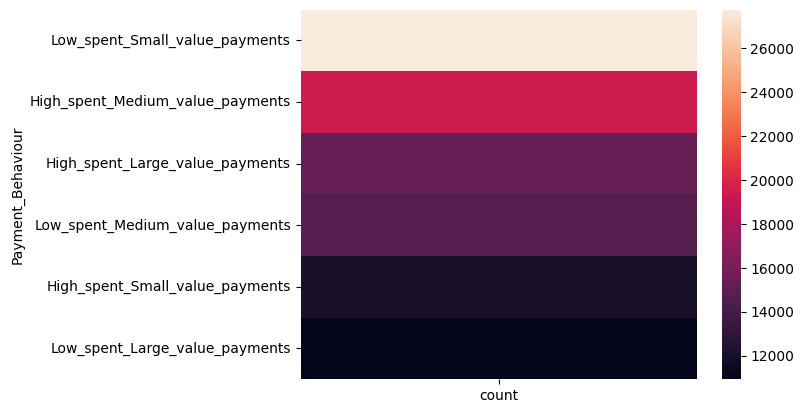

In [ ]:
for name in object_feature:
  sns.heatmap(data_credit[name].value_counts().to_frame())
  plt.show()

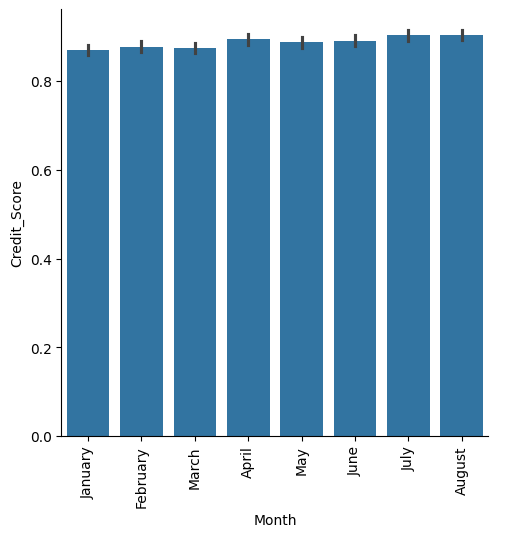

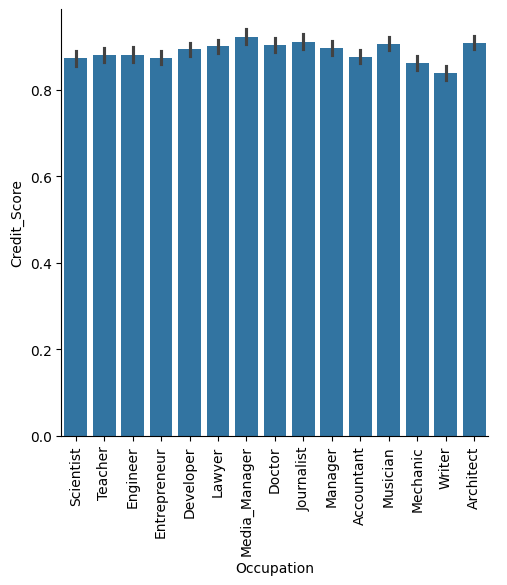

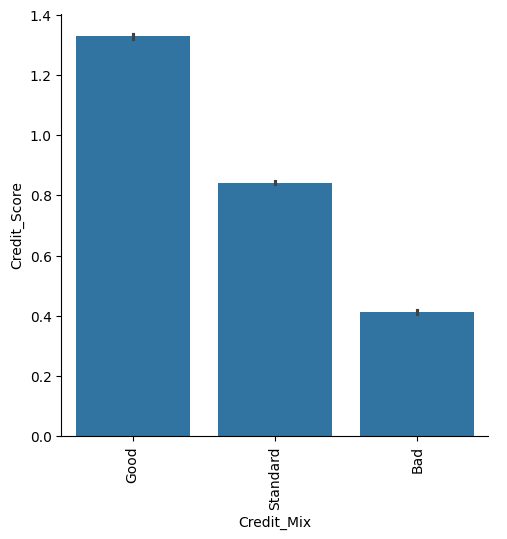

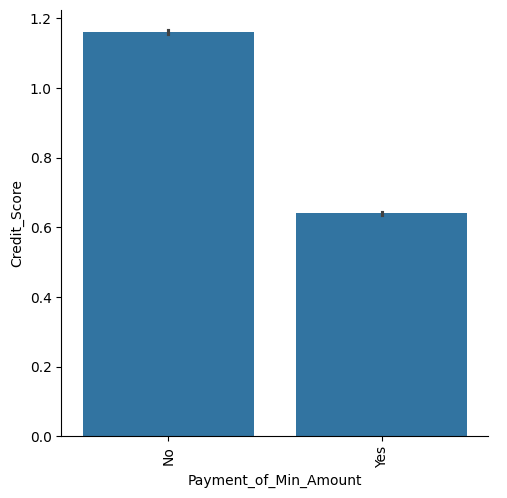

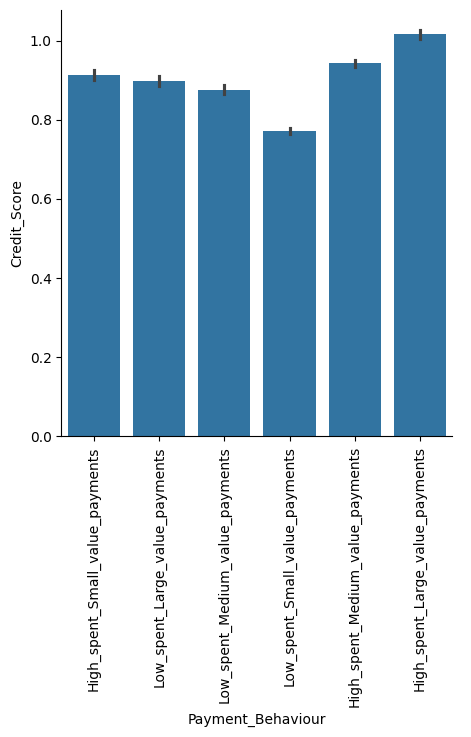

In [ ]:
for name in object_feature:
  sns.catplot(data=data_credit, x=name, y="Credit_Score", kind="bar")
  plt.xticks(rotation=90)
  plt.show()

Можно сделать вывод, что начличие или отсутствие минимальный выплаты по кредиту и задолженность по кредитной карте существенно влияют на целевую переменную.


##### Отбор признаков (Feature selection)

Начнем с категориальных данных. Набольшее различие в зависимости от целевой переменной имеют признаки, описывающие выплату минимального платежа по кредиту (Payment_of_Min_Amount) и задолженность по кредитной карте (Credit_Mix).    
В остальных признаках среднее значение по уникальным данным примерно одинаковые

Для обучения модели удалим столбцы со значениями идентификатора, личными данными, месяцами и типами прошлых кредитов.
Из численных признаков оставим только те, которые непостредственно связаны с кредитами. Например, признак Amount_invested_monthly (ежемесячная сумма инвестирования) можно удалить.

In [ ]:
data_credit = data_credit.drop(['ID', 'Customer_ID', 'Name', 'SSN', 'Month', 'Amount_invested_monthly', 'Type_of_Loan'], axis=1 )

In [ ]:
data_credit.describe(include='all')

Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
count   100000.000000     100000   1.000000e+05          100000.000000   
unique            NaN         15            NaN                    NaN   
top               NaN     Lawyer            NaN                    NaN   
freq              NaN       7101            NaN                    NaN   
mean        33.303370        NaN   1.764157e+05            4199.484352   
std         10.764915        NaN   1.429618e+06            3188.429638   
min         14.000000        NaN   7.005930e+03             303.645417   
25%         24.000000        NaN   1.945750e+04            1626.594167   
50%         33.000000        NaN   3.757861e+04            3096.836667   
75%         42.000000        NaN   7.279092e+04            5964.883333   
max         56.000000        NaN   2.419806e+07           15204.633333   

        Num_Bank_Accounts  Num_Credit_Card  Interest_Rate    Num_of_Loan  \
count       100000.000000    100000.000000  100000.000000  100000.000000   
unique                NaN              NaN            NaN            NaN   
top                   NaN              NaN            NaN            NaN   
freq                  NaN              NaN            NaN            NaN   
mean            17.091700        22.474560      72.466040      10.761960   
std            117.404773       129.057388     466.422621      61.789933   
min              0.000000         1.000000       1.000000       0.000000   
25%              3.000000         4.000000       8.000000       2.000000   
50%              6.000000         5.000000      13.000000       3.000000   
75%              7.000000         7.000000      20.000000       6.000000   
max           1798.000000      1499.000000    5797.000000    1496.000000   

        Delay_from_due_date  Num_of_Delayed_Payment  ...  \
count         100000.000000           100000.000000  ...   
unique                  NaN                     NaN  ...   
top                     NaN                     NaN  ...   
freq                    NaN                     NaN  ...   
mean              21.095040               30.864550  ...   
std               14.822802              225.686656  ...   
min                0.000000                0.000000  ...   
25%               10.000000                9.000000  ...   
50%               18.000000               14.000000  ...   
75%               28.000000               18.000000  ...   
max               67.000000             4397.000000  ...   

        Num_Credit_Inquiries  Credit_Mix Outstanding_Debt  \
count           100000.00000      100000    100000.000000   
unique                   NaN           3              NaN   
top                      NaN    Standard              NaN   
freq                     NaN       45848              NaN   
mean                27.69915         NaN      1426.220376   
std                192.96762         NaN      1155.129026   
min                  0.00000         NaN         0.230000   
25%                  3.00000         NaN       566.072500   
50%                  6.00000         NaN      1166.155000   
75%                  9.00000         NaN      1945.962500   
max               2597.00000         NaN      4998.070000   

        Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
count              100000.000000       100000.000000                 100000   
unique                       NaN                 NaN                      2   
top                          NaN                 NaN                    Yes   
freq                         NaN                 NaN                  52326   
mean                   32.285173          220.911270                    NaN   
std                     5.116875           99.682053                    NaN   
min                    20.000000            1.000000                    NaN   
25%                    28.052567          144.000000                    NaN   
50%                    32.305784          219.00000

In [ ]:
data = pd.get_dummies(data_credit)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Age                                                 100000 non-null  float64
 1   Annual_Income                                       100000 non-null  float64
 2   Monthly_Inhand_Salary                               100000 non-null  float64
 3   Num_Bank_Accounts                                   100000 non-null  float64
 4   Num_Credit_Card                                     100000 non-null  float64
 5   Interest_Rate                                       100000 non-null  float64
 6   Num_of_Loan                                         100000 non-null  float64
 7   Delay_from_due_date                                 100000 non-null  int64  
 8   Num_of_Delayed_Payment                              100000 non-nu

In [ ]:
data.to_csv("Mod_Data.csv")

##### Подготовка данных (Data Preparation)

Разделим датасет на обучающую и тестовую выборку.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = data['Credit_Score']
X = data.drop('Credit_Score', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

#### 3. Выберите несколько метрик для оценки моделей машинного обучения. Обоснуйте свой выбор и дайте интерпретацию метрик для бизнес-задачи

Для определения точности и полноты предсказания используем метрику F1-weighted. Эта метрика позволяет более точно определить среднее значение между precision и recall при дизбалансе классов. Она показывает среднюю эффективность работы модели относительно точности предсказания (процент истинно положительных классов-клинтов относительно классов-клиентов, предсказанных как положительные) и плотности (процент правильно предсказанных клиентов относительно всех истинно положительных классов-клиентов).    
Так же построим график метрики ROC-AUC. Он позволит определить оптимальный порог для принятия решения о категории клиента (вероятность принадлежности клиента к определенной категории).

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, accuracy_score

#### 4. Постройте 4 модели машинного обучения для решение поставленной задачи

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.classifier import ROCAUC

##### RandomForestClassifier

In [ ]:
model_RF = RandomForestClassifier().fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)

In [ ]:
print('f1-weighted: ', f1_score(y_test, y_pred_RF, average='weighted'))
y_pred_proba_RF = model_RF.predict_proba(X_test)
print('ROC-AUC: ', roc_auc_score(y_test, y_pred_proba_RF, average='weighted', multi_class='ovr'))

f1-weighted:  0.8091369445813461
ROC-AUC:  0.9066428227812887


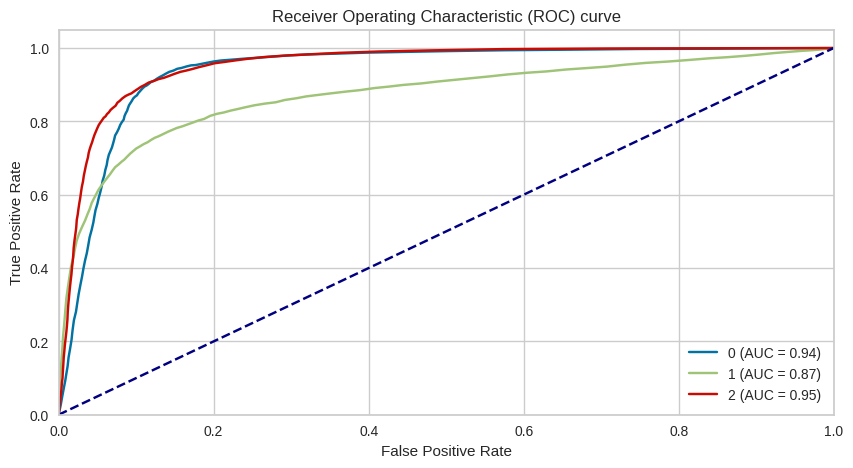

In [ ]:
thr_dict = {}
tpr_d = {}
fpr_d = {}
plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y))):
    fpr, tpr, thr = roc_curve(y_test == i, y_pred_proba_RF[:, i])
    thr_dict[i] = thr
    tpr_d[i] = thr
    fpr_d[i] = fpr
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from numpy import argmax

In [ ]:
opt_thr_d = {}
for i in range(len(np.unique(y))):
  mean_geom = np.sqrt(tpr_d[i] * fpr_d[i]) # Для нахождения оптимального порогового значения используем среднее геометрическое
  ix = np.argmax(mean_geom)
  opt_thr_d[i] = thr_dict[i][ix]

In [ ]:
optim = sum(opt_thr_d.values())/len(opt_thr_d.values())
print(f'Оптимальные значения порога для каждого класса: {opt_thr_d}')
print(f'Среднее оптимальное значение порога: {optim}')

Оптимальные значения порога для каждого класса: {0: 0.5, 1: 0.24, 2: 0.2}
Среднее оптимальное значение порога: 0.3133333333333333


##### DecisionTreeClassifier



In [ ]:
model_DT = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_DT = model_DT.predict(X_test)

In [ ]:
f1 = f1_score(y_test, y_pred_DT, average='weighted')
print(f'f1-weighted: {f1}')
y_pred_proba_DT = model_DT.predict_proba(X_test)
print('ROC-AUC: ', roc_auc_score(y_test, y_pred_proba_DT, average='weighted', multi_class='ovr'))

f1-weighted: 0.7289411478657992
ROC-AUC:  0.7671888534279726


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


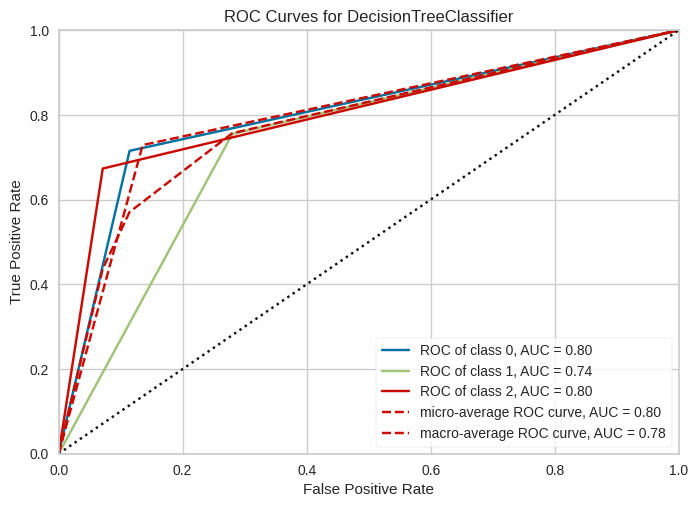

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(model_DT, classes=["0", "1", "2"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

##### MLPClassifier

In [ ]:
model_MLP = MLPClassifier(hidden_layer_sizes=100).fit(X_train, y_train)
y_pred_MLP = model_MLP.predict(X_test)

In [ ]:
print('f1-weighted :', f1_score(y_test, y_pred_MLP, average='weighted'))
y_pred_proba_MLP = model_MLP.predict_proba(X_test)
print('ROC-AUC :', roc_auc_score(y_test, y_pred_proba_MLP, average='weighted', multi_class='ovr'))

f1-weighted : 0.5591243018008665
ROC-AUC : 0.7172986206069191


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


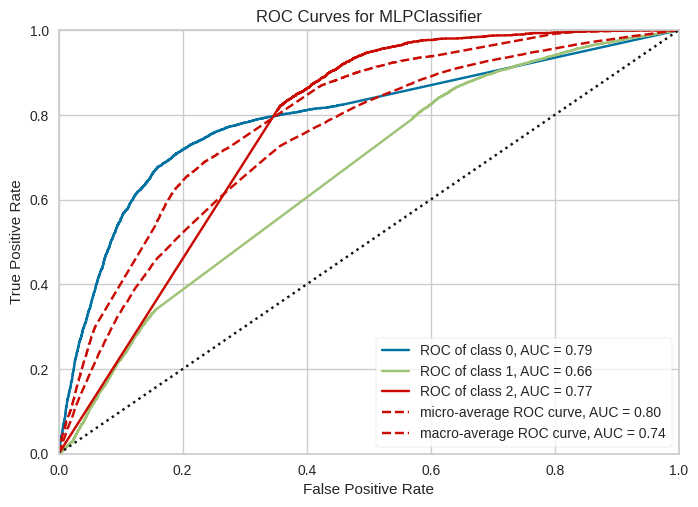

<Axes: title={'center': 'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(model_MLP, classes=["0", "1", "2"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

##### KNeighborsClassifier

In [ ]:
model_KN = KNeighborsClassifier(n_neighbors=8).fit(X_train, y_train)
y_pred_KN = model_KN.predict(X_test)

In [ ]:
print('f1-weighted :', f1_score(y_test, y_pred_KN, average='weighted'))
y_pred_proba_KN = model_KN.predict_proba(X_test)
print('ROC-AUC :',  roc_auc_score(y_test, y_pred_proba_KN, average='weighted', multi_class='ovr'))

f1-weighted : 0.7010000307959395
ROC-AUC : 0.8392321227196448


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


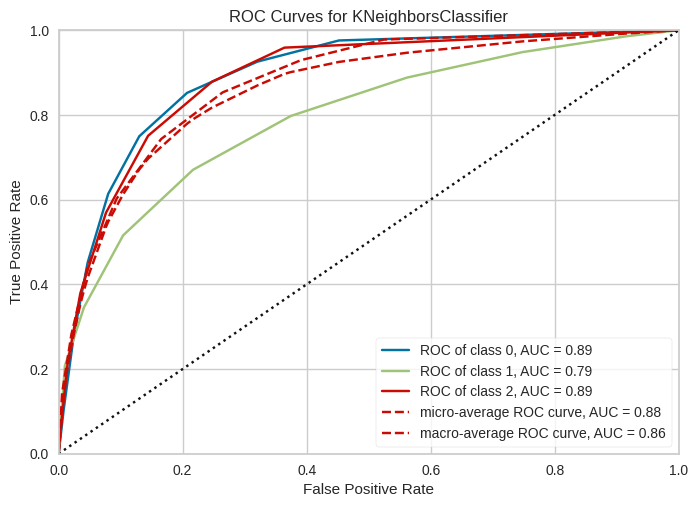

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
visualizer = ROCAUC(model_KN, classes=["0", "1", "2"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

##### Вывод: Лучше всего справилась модель "Случайный лес", средний ROC_AUC по классам равняется 90%

#### 5. Проведите диагностику лучшей модели из пункта 4.

In [ ]:
from yellowbrick.model_selection import LearningCurve

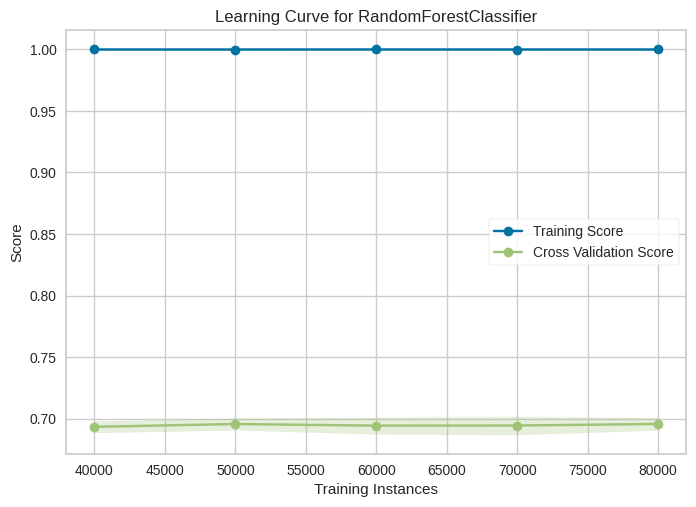

In [ ]:
visualizer = LearningCurve(
    RandomForestClassifier(), train_sizes=np.linspace(0.5, 1.0, 5),  scoring='f1_weighted'
).fit(X, y).show()

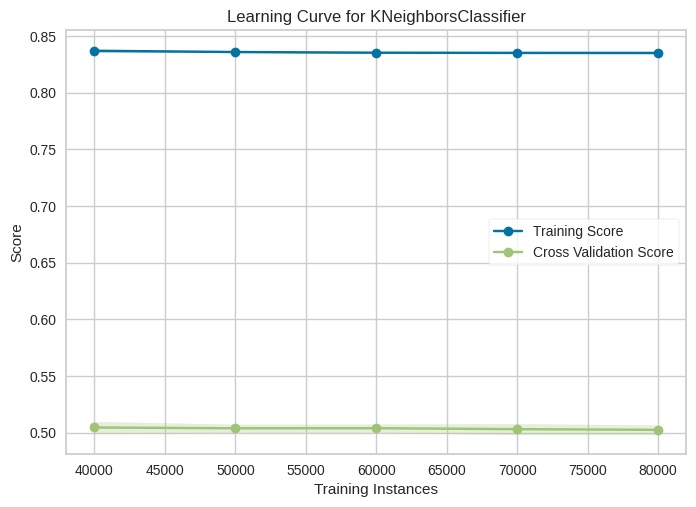

In [ ]:
visualizer = LearningCurve(
    KNeighborsClassifier(), train_sizes=np.linspace(0.5, 1.0, 5)
).fit(X, y).show()

При диагностики лучшей модели обнаружено переобучение. Возможно, эта модель слишком сложная.

#### 6. Сделайте подбор гиперпараметров для лучшей модели из пункта 4.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_estimators': [50, 200],
              'max_depth': [10, 200, 500],
              'max_features': ['sqrt', 'log2', None]}

In [ ]:
grid_model = GridSearchCV(estimator=model_RF,
                          param_grid=param_grid,
                          scoring='f1_weighted',
                          cv=5,
                          verbose=2)

In [ ]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   6.4s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   6.6s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   5.2s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   6.5s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   5.7s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=  26.5s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=  28.5s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=  24.2s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=  22.5s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=200; total time=  23.4s
[CV] END ...max_depth=10, max_features=log2, n_estimators=50; total time=   4.5s
[CV] END ...max_depth=10, max_features=log2, n_e

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 200, 500],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 200]},
             scoring='f1_weighted', verbose=2)

In [ ]:
grid_model.best_estimator_

RandomForestClassifier(max_depth=200, n_estimators=200)

In [ ]:
print('Лучший результат f1_score: ', grid_model.best_score_)
print('Лучшие параметры для модели: ', grid_model.best_params_)

Лучший результат f1_score:  0.8023137426641975
Лучшие параметры для модели:  {'max_depth': 200, 'max_features': 'sqrt', 'n_estimators': 200}


In [ ]:
y_pred_BM = grid_model.predict(X_test)
print('f1-weighted: ', f1_score(y_test, y_pred_BM, average='weighted'))
y_pred_proba_BM = grid_model.predict_proba(X_test)
print('ROC-AUC: ', roc_auc_score(y_test, y_pred_proba_BM, average='weighted', multi_class='ovr'))

f1-weighted:  0.8096102017668064
ROC-AUC:  0.9076592653636957


<Axes: >

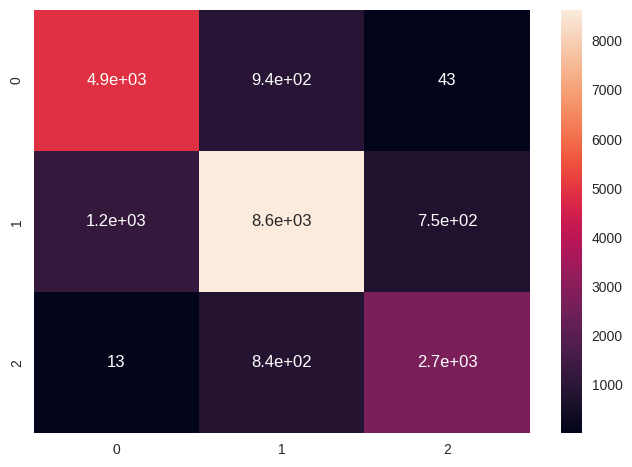

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_BM), annot=True)

#### Вывод

  
Для обучения модели была произведена предобработка и анализ датасета. В результате были обнаружены аномалии в виде ошибочно заполненных данных, непривальная типизация признаков и пропуски значений. Влияние отдельных аттрибутов на целувую переменную наблюдается только в двух катигариальных классах: Payment_of_Min_Amount - наличие выплаты минимального плтежа и Credit_Mix - задолженность по кредитной карте. Для обучения были удалены столбцы, содержащие полностья уникальные знаяения, и численные признаки, не относящиеся к характеристики кредитной истории клиента.    
Для оценки модели были выбраны две метрики: RandomForestClassifier DecisionTreeClassifier, MLPClassifier, KNeighborsClassifier. Наилучший результат по выбранным метрикам показала модель "Случайный лес", однако при ее диагностики было замечено переобучение. Это может быть связано с тем, что модель слишком сложная, к тому же при обработке данных были замечены не все аномальные значения.    
С учетом производительных мощностей были достигнуты максимальные результаты обучения.    
Подбор параметров показал идентичные результаты, показатели метрик увеличились на тысячные значения.

